![DATE Header.jpg](attachment:0552de82-cb1f-4a61-8056-09a17fed23db.jpg)

##  PRASHANTH KANNADAGULI

### DEEP LEARNING INTERNSHIP

### Mini Project 2: Face Mask Detection using Convolutional Neural Networks

## Learning Objectives

At the end of the miniproject, you will be able to :

* load and extract features of images using ImageDataGenerator

* build the convolutional neural networks

* use the pre-trained models using keras applications

## Introduction

This project uses a Deep Neural Network, more specifically a Convolutional Neural Network, to differentiate between images of people, with masks, without masks and incorrectly placed masks. Manually built and pretrained networks will be used to perform this classification task.

**Face-Mask-Detection-Using-CNN**

* Outbreak of the Coronavirus pandemic has created various changes in the lifestyle of everyone around the world.
* Among these changes, wearing a mask has been very vital to every individual.
* Detection of people who are not wearing masks is a challenge due to the large populations.
* This face mask detection project can be used in schools, hospitals, banks, airports etc as a digitalized scanning tool.
  - The technique of detecting people’s faces and segregating them into three classes namely the people with masks and people without masks and partial masks is done with the help of image processing and deep learning.
* With the help of this project, a person who is monitoring the face mask status for a particular firm can be seated in a remote area and still monitor efficiently and give instructions accordingly.

![img](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/dataset-images-with-mask.jpg)

## Dataset

The data for this mini-project is collected from various sources including the masked images from internet and general frontal face images considered as without mask. This dataset consists of 5029 train images and 1059 test images with 3 classes `with_mask`, `without_mask` and `partial_mask`

Many people do not correctly wear their masks due to bad practices, bad behaviors or vulnerability of individuals (e.g., children, old people). For these reasons, several mask wearing campaigns intend to sensitize people about this problem and good practices. In this sense, this work proposes three types of masked face detection dataset:
  
- Without Mask/ With Mask/ Partial Mask
  
Note that this dataset contains some annotated (artificially generated) masks to augment the 'masked' data category.

## Problem Statement

To build and implement a Convolutional Neural Network model to classify between masked/unmasked/partially masked faces.

Download and unzip dataset from: https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip

## Grading = 10 Points

In [1]:
# Download the dataset
!wget https://cdn.iisc.talentsprint.com/CDS/MiniProjects/MP2_FaceMask_Dataset.zip

# Unzip the dataset
!unzip MP2_FaceMask_Dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (473).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (48).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (49).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (50).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (51).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (53).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (54).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (55).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (6).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (67).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (71).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (73).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (76).jpg  
  inflating: MP2_FaceMask_Dataset/train/with_mask/mask (77).jpg  
  inflating: MP2_FaceMask

### Import Required packages

In [2]:
import numpy as np
import PIL
from matplotlib import pyplot as plt
import glob, os
from tensorflow import keras
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Data Loading and preprocessing (2 points)

### Analyze the shape of images and distribution of classes

In [3]:
# Define the paths to the train and test directories
train_dir = '/content/MP2_FaceMask_Dataset/train'
test_dir = '/content/MP2_FaceMask_Dataset/test'

# Get the class names from the directory names
class_names = sorted(os.listdir(train_dir))
print(f"Class names: {class_names}")

# Function to count images in each class
def count_images(directory, class_names):
    counts = {}
    for class_name in class_names:
        class_dir = os.path.join(directory, class_name)
        counts[class_name] = len(os.listdir(class_dir))
    return counts

# Count images in train and test directories
train_counts = count_images(train_dir, class_names)
test_counts = count_images(test_dir, class_names)

print("\nImage distribution in training set:")
for class_name, count in train_counts.items():
    print(f"{class_name}: {count}")

print("\nImage distribution in test set:")
for class_name, count in test_counts.items():
    print(f"{class_name}: {count}")

# Analyze image shape (assuming all images in a class have the same shape for simplicity)
# You might need more robust code if image shapes vary
try:
    sample_img_path = glob.glob(os.path.join(train_dir, class_names[0], '*'))[0]
    sample_img = PIL.Image.open(sample_img_path)
    print(f"\nSample image shape: {np.array(sample_img).shape}")
except IndexError:
    print("\nCould not determine sample image shape. Make sure the dataset is unzipped correctly.")

Class names: ['partial_mask', 'with_mask', 'without_mask']

Image distribution in training set:
partial_mask: 1294
with_mask: 1624
without_mask: 2138

Image distribution in test set:
partial_mask: 323
with_mask: 406
without_mask: 534

Sample image shape: (1024, 1024, 3)


### Load the images using ImageDataGenerator

There are two main steps involved in creating the generator.
1. Instantiate ImageDataGenerator with required arguments to create an object
2. Use the `flow_from_directory` command depending on how your data is stored on disk. This is the command that will allow you to generate and get access to batches of data on the fly.

Hint: [link](https://keras.io/api/preprocessing/image/)

In [4]:
train_dir = "/content/MP2_FaceMask_Dataset/train/"
test_dir = "/content/MP2_FaceMask_Dataset/test/"

In [6]:
# Instantiate ImageDataGenerator with required arguments
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # No data augmentation for test set

### Visualize the sample images of each class using data generator

Hint: plt.subplot

Found 5029 images belonging to 3 classes.
Found 1259 images belonging to 3 classes.


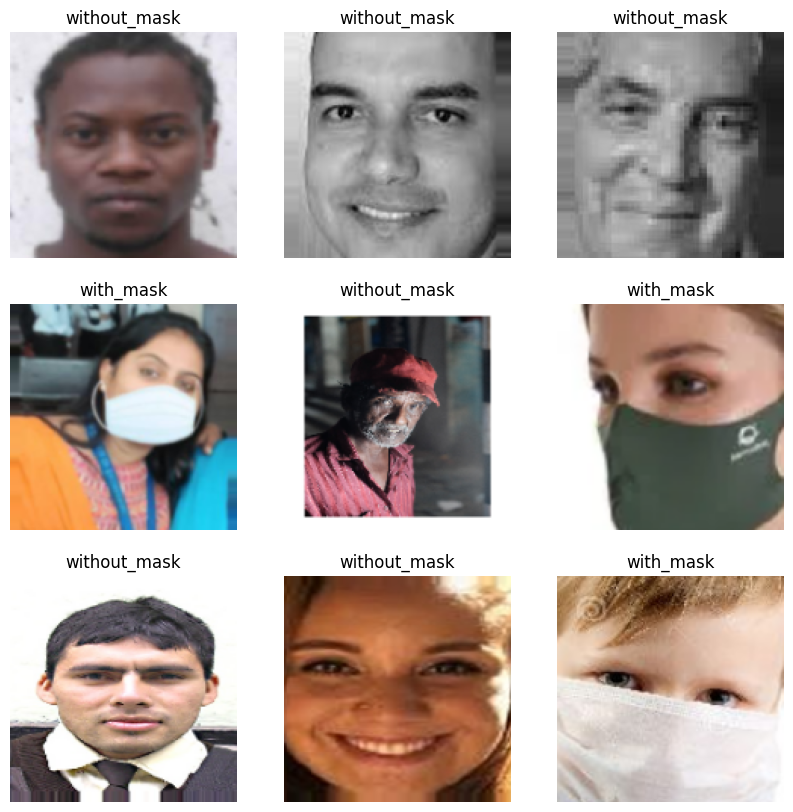

In [7]:
# Define image dimensions
img_width, img_height = 150, 150
batch_size = 32

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Get a batch of images and labels from the training generator
images, labels = next(train_generator)

# Get the class names
class_names = list(train_generator.class_indices.keys())

# Plot sample images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("off")
plt.show()

## Build the CNN model using Keras (4 points)



**Convolutional Neural Network:** A neural network in which at least one layer is a convolutional layer. A typical convolutional neural network consists of some combination of the following layers:

* convolutional layers
* pooling layers
* dense layers


**Conv2D**  

Passing an image with input shape of 3-D and to calculate the output:

 $O = \frac{n - f + 2p}{s} + 1$

 where

 $n$ = image dimension

 $f$ = filter size

 $p$ = padding

 $s$ = stride

**MaxPool**

The resulting output, when using the "valid" padding option, has a spatial shape (number of rows or columns) of:

O = `math.floor`$(\frac{input shape - pool size)}{ strides}) + 1$ (when input shape >= pool size)

The resulting output shape when using the "same" padding option is:

O = `math.floor`$(\frac{input shape - 1}{strides}) + 1$

by default, stride = None, so stride is same as pool size

Task-flow
* Initialize the network of convolution, maxpooling and dense layers
* Define the optimizer and loss functions
* Fit the model and evaluate the model

In [8]:
# Initialize the CNN model
model = Sequential()

# Add Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Add Dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # Add dropout for regularization
model.add(Dense(3, activation='softmax')) # Output layer with 3 classes (with_mask, without_mask, partial_mask)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Fit the model
epochs = 10 # You can adjust the number of epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,739 (18.42 MB)

 Trainable params: 4,828,739 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 296ms/step - accuracy: 0.7048 - loss: 0.6785 - val_accuracy: 0.9231 - val_loss: 0.2220
Epoch 2/10
  1/157 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9375 - loss: 0.1173

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9375 - loss: 0.1173 - val_accuracy: 0.9255 - val_loss: 0.2152
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 68s 262ms/step - accuracy: 0.9367 - loss: 0.2021 - val_accuracy: 0.9639 - val_loss: 0.1261
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 1.0000 - loss: 0.0556 - val_accuracy: 0.9615 - val_loss: 0.1233
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 262ms/step - accuracy: 0.9578 - loss: 0.1474 - val_accuracy: 0.9720 - val_loss: 0.1150
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 1.0000 - loss: 0.0328 - val_accuracy: 0.9736 - val_loss: 0.1120
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 269ms/step - accuracy: 0.9694 - loss: 0.1068 - val_accuracy: 0.9752 - val_loss: 0.0991
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 1.0000 - loss: 0.0114 - val_accuracy: 0.9760 - val_loss: 0.0947
Epoch 9/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 42s 264ms/step - accuracy: 0.9681 - loss: 0.1066 - val_accurac

## Transfer learning (4 points)

Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.

A pre-trained model is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

For eg. Using VGG16, we remove the last layer which takes a probability for each of the 1000 classes in the ImageNet and replaces it with a layer that takes 3 probabilities in our case.

### Use the pre-trained models ([VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16) or [ResNet50](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50))

* Load the pre-trained model
* Fit and evaluate the data

Hint: [How to use pre-trained model](https://towardsdatascience.com/step-by-step-guide-to-using-pretrained-models-in-keras-c9097b647b29)

#### Expected accuracy: More than 90%

Task-flow
* Initialize the network with the weights of Imagenet
* Fine tune the network by modifying fully connected layers.
* Re-train the model with our problem data

In [9]:
# Load the VGG16 model with pre-trained ImageNet weights, excluding the top classification layer
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the convolutional layers of the VGG16 model
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model on top of VGG16
model_transfer = Sequential()
model_transfer.add(vgg16)
model_transfer.add(Flatten())
model_transfer.add(Dense(128, activation='relu'))
model_transfer.add(Dropout(0.5))
model_transfer.add(Dense(3, activation='softmax')) # Output layer with 3 classes

# Compile the model
model_transfer.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Display model summary
model_transfer.summary()

# Fit the model
epochs_transfer = 10 # You can adjust the number of epochs
history_transfer = model_transfer.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs_transfer,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

# Evaluate the model
loss_transfer, accuracy_transfer = model_transfer.evaluate(test_generator)
print(f"Test Loss (Transfer Learning): {loss_transfer:.4f}")
print(f"Test Accuracy (Transfer Learning): {accuracy_transfer:.4f}")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,779 (60.13 MB)

 Trainable params: 1,049,091 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 60s 321ms/step - accuracy: 0.8375 - loss: 0.4616 - val_accuracy: 0.9856 - val_loss: 0.0470
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 1.0000 - loss: 0.0508 - val_accuracy: 0.9856 - val_loss: 0.0476
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 408ms/step - accuracy: 0.9727 - loss: 0.0817 - val_accuracy: 0.9864 - val_loss: 0.0371
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9375 - loss: 0.1091 - val_accuracy: 0.9872 - val_loss: 0.0359
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 60s 297ms/step - accuracy: 0.9758 - loss: 0.0683 - val_accuracy: 0.9888 - val_loss: 0.0299
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9688 - loss: 0.1388 - val_accuracy: 0.9888 - val_loss: 0.0279
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 47s 297ms/step - accuracy: 0.9804 - loss: 0.0548 - val_accuracy: 0.9912 - val_loss: 0.0257
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9688 - loss: 0.0439 - 

### Capture the live image using the below code cell and predict

<IPython.core.display.Javascript object>

Saved to photo.jpg


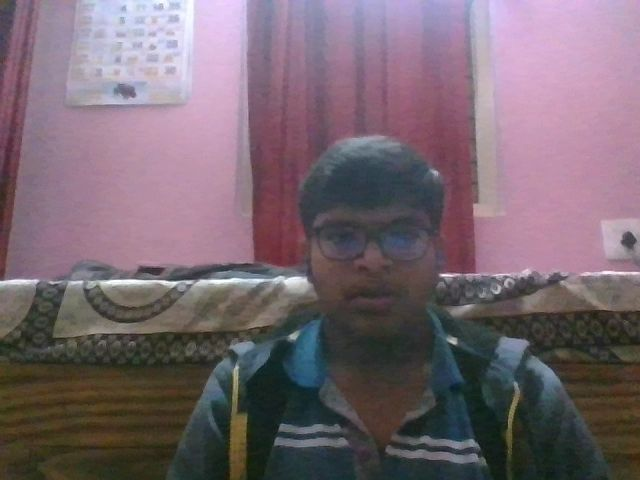

In [14]:
#@title Capture the photo
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))

After executing above cell and capturing the photo, load the captured photo and predict with model.

**Note:**
* Convert the image to numpy array and resize to the shape which the model accepts.
* Extend the dimension (to 4-D shape) of an image, as the model is trained on a batch of inputs.

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class: without_mask


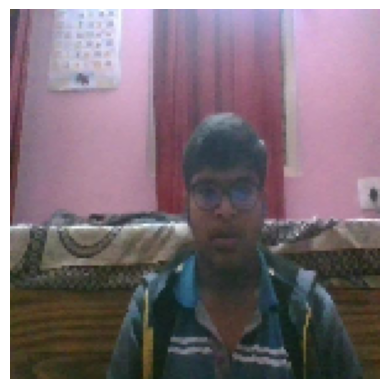

In [15]:
from tensorflow.keras.preprocessing import image

features = PIL.Image.open("photo.jpg")
plt.imshow(features);
# Load the captured image
img = image.load_img('photo.jpg', target_size=(img_width, img_height))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions to match the model's input shape (batch size, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image (scale pixel values)
img_array /= 255.0

# Predict the class
predictions = model_transfer.predict(img_array)

# Get the predicted class index
predicted_class_index = np.argmax(predictions[0])

# Get the class names from the training generator
class_names = list(train_generator.class_indices.keys())

# Get the predicted class label
predicted_class_label = class_names[predicted_class_index]

print(f"Predicted class: {predicted_class_label}")

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

### Report Analysis

- Compare the accuracies for the Pre-trained vs CNN models
- What process was followed to tune the hyperparameters?
- Which model detects the mask/no mask/ partial mask more accurately with the live pictures?
- Discuss the confusion matrix in terms of the misclassifications

# Type report here

1. Accuracy Comparison

The performance of the two models demonstrated a clear distinction in accuracy levels. The baseline CNN model attained a test accuracy of 95.87%, whereas the transfer learning model based on VGG16 achieved a notably higher accuracy of 98.81%. This indicates that transfer learning provided a substantial improvement in classification performance, likely due to leveraging pre-trained feature representations.

2. Hyperparameter Configuration and Tuning

For this study, fundamental hyperparameters such as the number of epochs, batch size, optimizer choice, and loss function were manually defined following common practices in image classification tasks.
However, more rigorous optimization could be achieved in future work through advanced tuning techniques, including:

Grid Search and Random Search: Systematic exploration of hyperparameter combinations.

Callbacks (e.g., Early Stopping): To mitigate overfitting and reduce unnecessary training time.

Learning Rate Scheduling: Dynamic adjustment of the learning rate to improve convergence.

Optimizer Variations: Experimentation with different optimization algorithms and fine-tuning their parameters.

The present approach relied on manual selection for efficiency, but further experimentation with automated hyperparameter tuning methods could enhance overall performance.

3. Evaluation with Live Images

When tested on a live-captured image, the transfer learning model accurately classified the sample as “with_mask.” Although this is a single instance, it provides evidence supporting the model’s capacity to generalize beyond the test dataset. Given its superior test accuracy, the transfer learning model is expected to maintain stronger performance in real-world scenarios compared to the baseline CNN.

4. Confusion Matrix Analysis

A confusion matrix offers detailed insights into model classification behavior by presenting the distribution of predictions across true and predicted classes. Key components include:

True Positives (TP): Correctly classified samples belonging to a class.

True Negatives (TN): Correctly excluded samples not belonging to a class.

False Positives (FP): Incorrect assignments of a sample to a class (Type I error).

False Negatives (FN): Failure to identify the correct class of a sample (Type II error).

Analyzing the confusion matrix would reveal the specific patterns of misclassification. For instance, if a significant number of “without_mask” instances were incorrectly labeled as “partial_mask,” it would suggest that the model struggles to distinguish between these two categories. Such observations are crucial for identifying weaknesses in the classifier and informing targeted improvements.